# Description

The dataset:https://www.kaggle.com/datasets/kanchana1990/real-estate-data-utah-20241. Download the data set, and upload it to the workspace.2. Add a new notebook.3. You need to do all next steps to answer the question:  what’s the relation between number of beds and the price?4. Read the dataset in a code cell.5. Assessing & Cleaning. ( Just basic, don’t put much time here )6. Explore the data and draw the conclusions.7. Answer the question

# Import Libraries

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker

%config InlineBackend.figure_format='retina'

# Load Dataset

In [74]:
df = pd.read_csv('real_estate_utah.csv')

# Inital Viewing of Dataset

In [75]:
df.head(1)

,type,text,year_built,beds,baths,baths_full,baths_half,garage,lot_sqft,sqft,stories,lastSoldOn,listPrice,status
0,single_family,"Escape to tranquility with this off-grid, unfi...",2020.0,1.0,1.0,1.0,1.0,2.0,71438.0,696.0,2.0,2018-05-31,90000.0,for_sale


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4440 entries, 0 to 4439
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   type        4440 non-null   object 
 1   text        4440 non-null   object 
 2   year_built  4440 non-null   float64
 3   beds        4440 non-null   float64
 4   baths       4440 non-null   float64
 5   baths_full  4440 non-null   float64
 6   baths_half  4440 non-null   float64
 7   garage      4440 non-null   float64
 8   lot_sqft    4440 non-null   float64
 9   sqft        4440 non-null   float64
 10  stories     4440 non-null   float64
 11  lastSoldOn  4440 non-null   object 
 12  listPrice   4440 non-null   float64
 13  status      4440 non-null   object 
dtypes: float64(10), object(4)
memory usage: 485.8+ KB


# Cleaning Dataset

## Checking for duplicates

In [77]:
df.duplicated().sum()

61

### Dropping duplicates

In [78]:
df.drop_duplicates(inplace=True)

### Confirming there are no more duplicates

In [79]:
df.duplicated().sum()

0

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4379 entries, 0 to 4439
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   type        4379 non-null   object 
 1   text        4379 non-null   object 
 2   year_built  4379 non-null   float64
 3   beds        4379 non-null   float64
 4   baths       4379 non-null   float64
 5   baths_full  4379 non-null   float64
 6   baths_half  4379 non-null   float64
 7   garage      4379 non-null   float64
 8   lot_sqft    4379 non-null   float64
 9   sqft        4379 non-null   float64
 10  stories     4379 non-null   float64
 11  lastSoldOn  4379 non-null   object 
 12  listPrice   4379 non-null   float64
 13  status      4379 non-null   object 
dtypes: float64(10), object(4)
memory usage: 513.2+ KB


## Check for nulls or na values

In [81]:
df.isna().sum()

type          0
text          0
year_built    0
beds          0
baths         0
baths_full    0
baths_half    0
garage        0
lot_sqft      0
sqft          0
stories       0
lastSoldOn    0
listPrice     0
status        0
dtype: int64

# Exploring the dataset

## what’s the relation between number of beds and the price?

In [48]:
df['beds'].value_counts()

beds
4.0     1702
3.0     1284
5.0      569
2.0      309
6.0      302
7.0       94
1.0       69
8.0       34
9.0       11
11.0       3
19.0       1
14.0       1
Name: count, dtype: int64

There aren't too many houses that have 11,14 or 19 beds.

In [68]:
df_beds_price = df.groupby('beds')['listPrice'].mean(numeric_only=True)
df_beds_price

beds
1.0     3.209895e+05
2.0     3.880907e+05
3.0     5.384780e+05
4.0     7.235133e+05
5.0     1.017139e+06
6.0     1.560307e+06
7.0     2.681692e+06
8.0     3.446844e+06
9.0     1.585800e+06
11.0    4.850000e+06
14.0    1.000000e+06
19.0    8.490000e+05
Name: listPrice, dtype: float64

###  A scatter plot

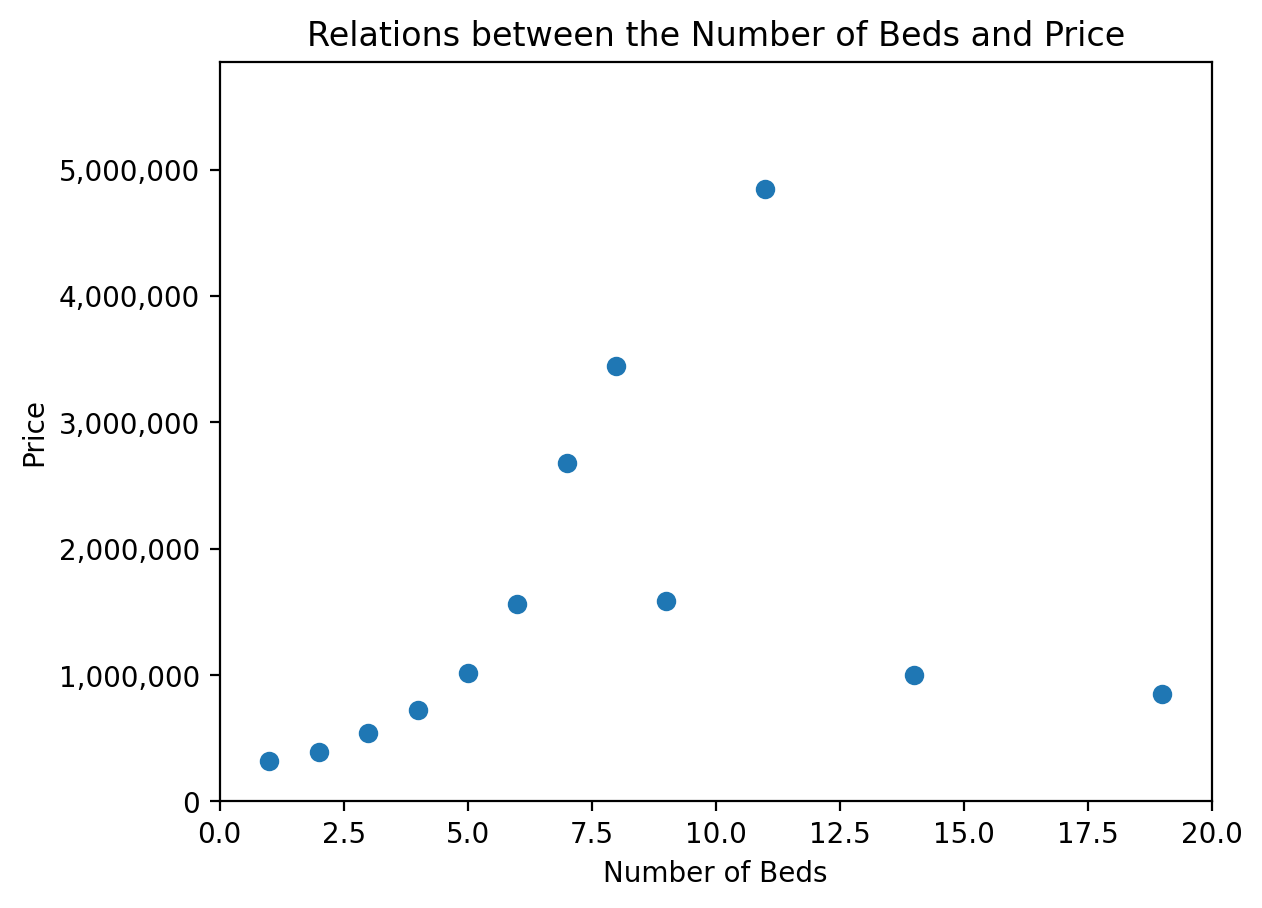

In [46]:
plt.scatter(df_beds_price.index, df_beds_price)

plt.ylabel("Price")
plt.xlabel("Number of Beds")

plt.xlim(0,20)
plt.ylim(0,df_beds_price.max()+1000000)

plt.title("Relations between the Number of Beds and Price")

plt.gca().get_yaxis().set_major_formatter(
    ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()

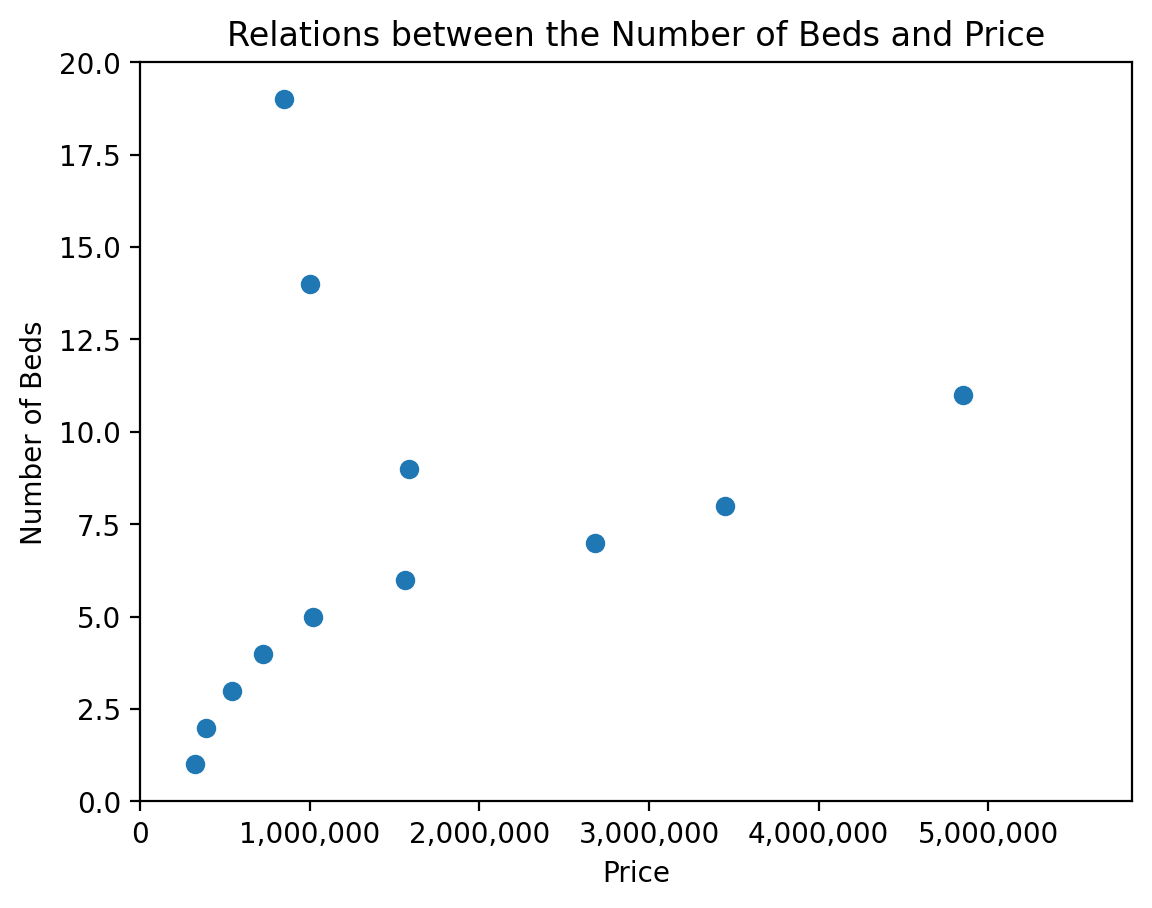

In [70]:
plt.scatter(df_beds_price,df_beds_price.index)

plt.xlabel("Price")
plt.ylabel("Number of Beds")
plt.title("Relations between the Number of Beds and Price")

plt.ylim(0,20)
plt.xlim(0,df_beds_price.max()+1000000)

plt.gca().get_xaxis().set_major_formatter(
    ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()

#### Excluding Outliers

In [60]:
df_without_outliers = df_beds_price.drop(index=[9,14,19]) 
df_without_outliers

beds
1.0     3.209895e+05
2.0     3.880907e+05
3.0     5.384780e+05
4.0     7.235133e+05
5.0     1.017139e+06
6.0     1.560307e+06
7.0     2.681692e+06
8.0     3.446844e+06
11.0    4.850000e+06
Name: listPrice, dtype: float64

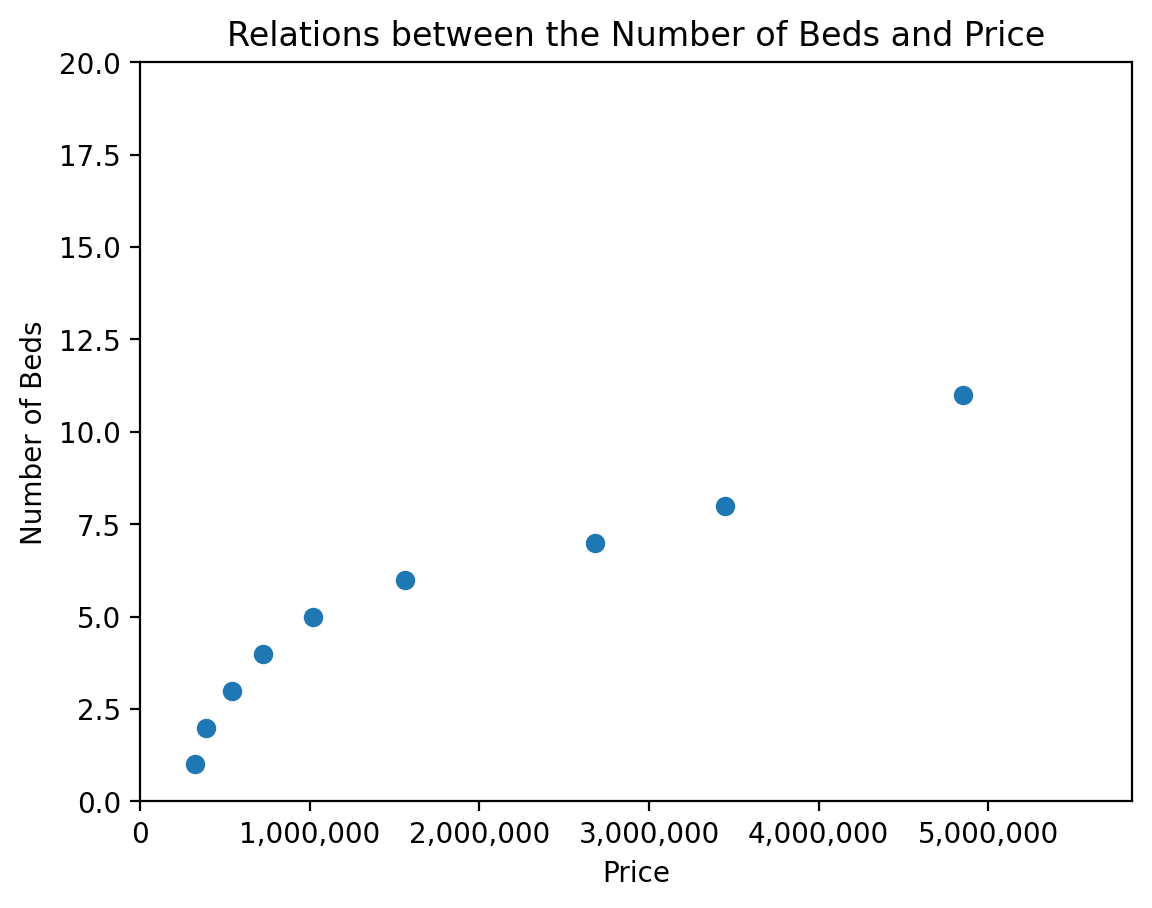

In [83]:
plt.scatter(df_without_outliers,df_without_outliers.index)


plt.xlabel("Price")
plt.ylabel("Number of Beds")

plt.ylim(0,20)
plt.xlim(0,df_beds_price.max()+1000000)
plt.title("Relations between the Number of Beds and Price")
plt.gca().get_xaxis().set_major_formatter(
    ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()

### With lines connecting the dots

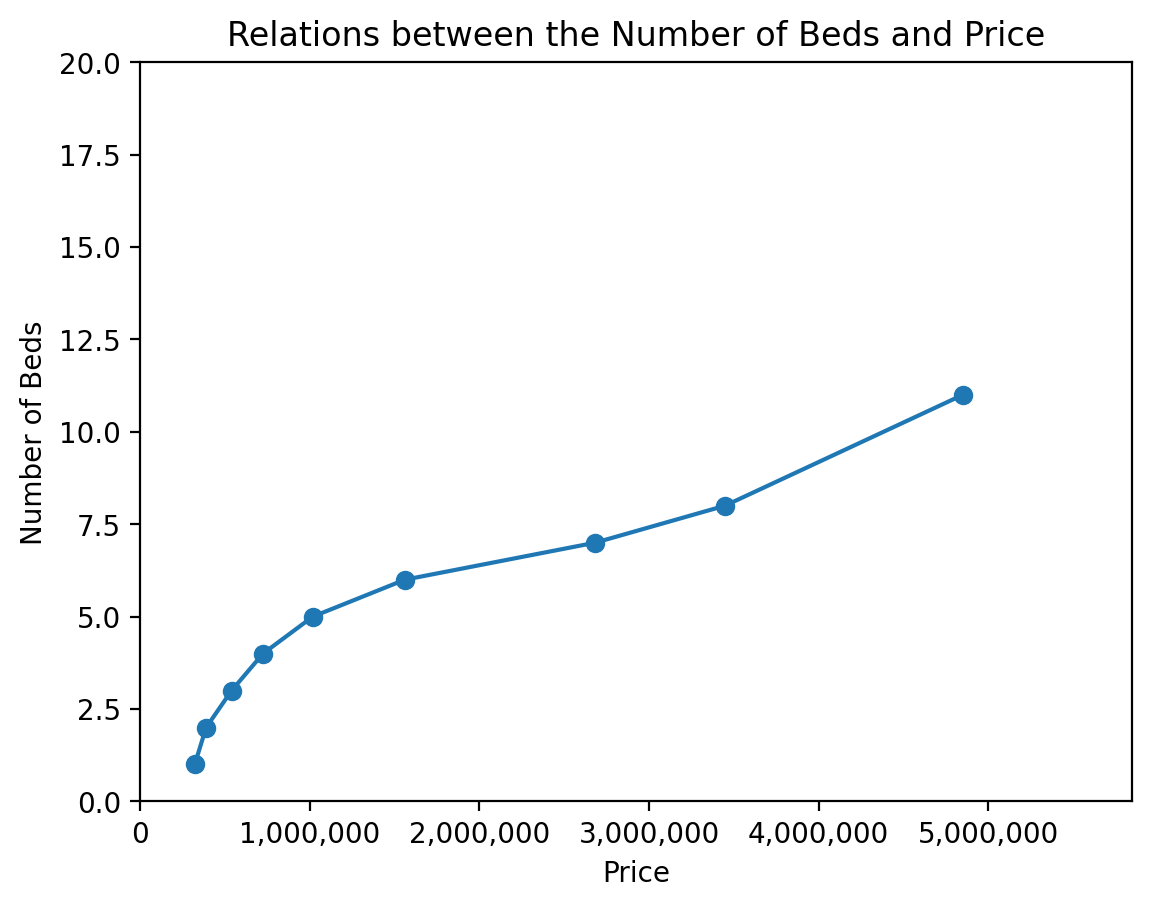

In [86]:
plt.scatter(df_without_outliers,df_without_outliers.index)
plt.plot(df_without_outliers, df_without_outliers.index)

plt.xlabel("Price")
plt.ylabel("Number of Beds")

plt.ylim(0,20)
plt.xlim(0,df_beds_price.max()+1000000)
plt.title("Relations between the Number of Beds and Price")
plt.gca().get_xaxis().set_major_formatter(
    ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()

### A Bar Plot

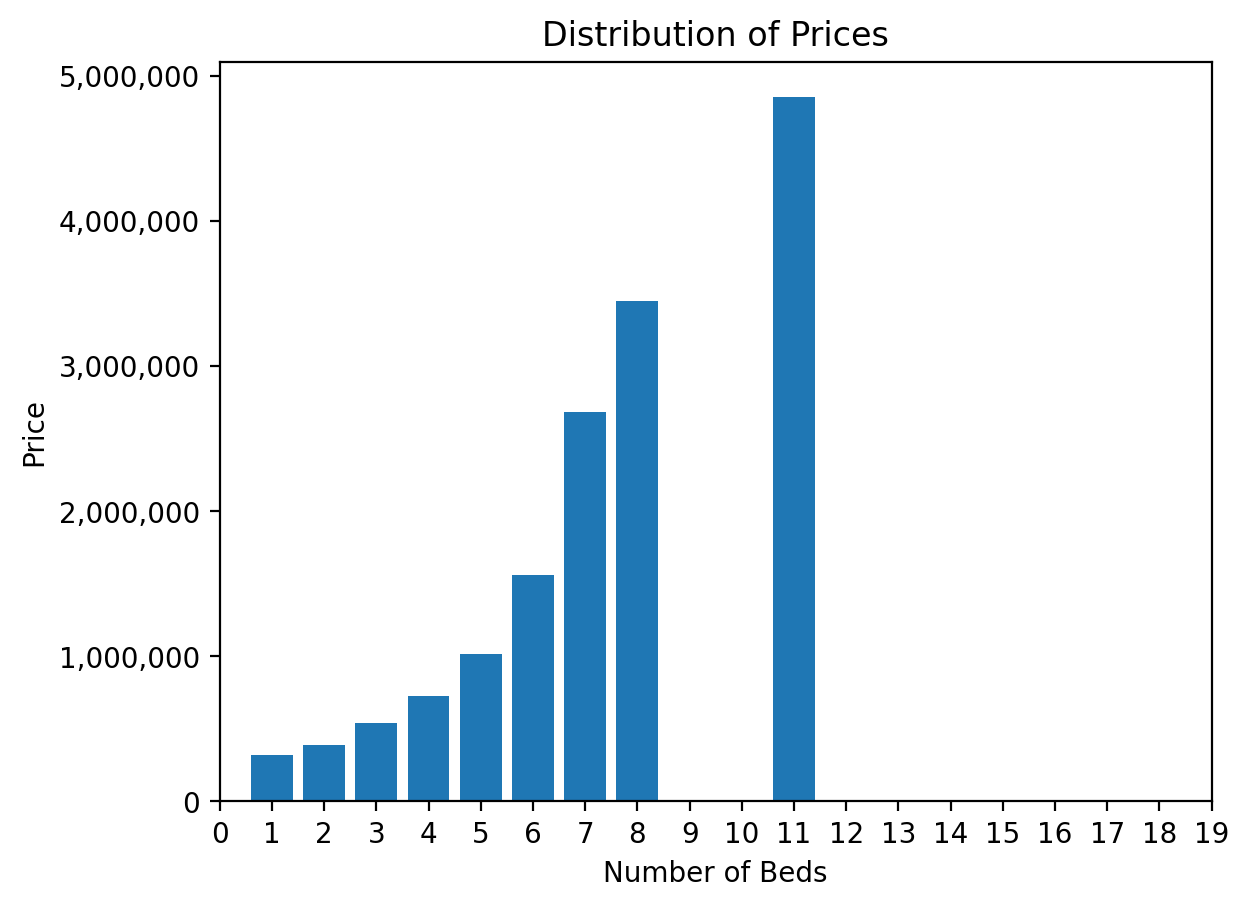

In [94]:
plt.bar(df_without_outliers.index,df_without_outliers)
plt.title("Distribution of Prices")

plt.ylabel("Price")
plt.xlabel("Number of Beds")

ticks = range(0,20,1)
ticks = list(ticks)
plt.xticks(ticks, minor=False)

plt.gca().get_yaxis().set_major_formatter(
    ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.show()

# Answering the question

The trend seems to show that the more beds there are in a house the more it will cost on average, with there being some outliers when the number of beds is 9, 14, 19